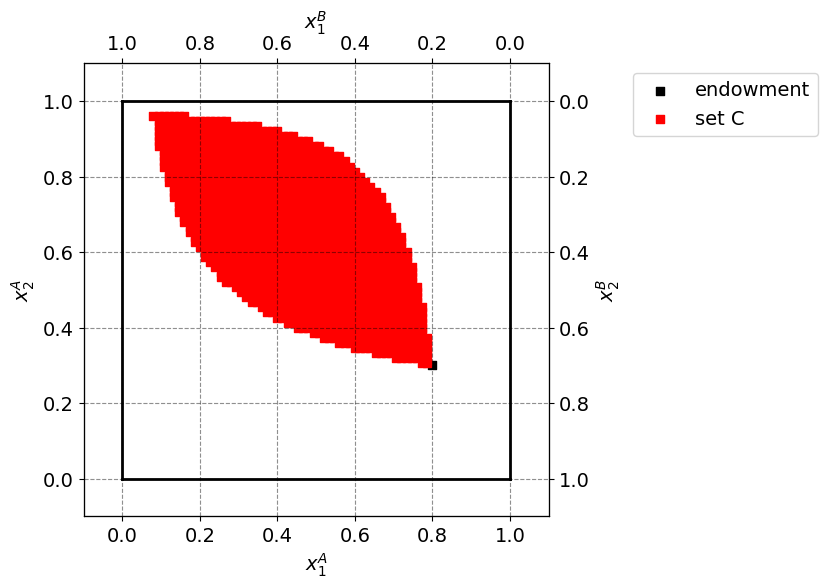

In [3]:
# Code start
# Imports
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import pandas as pd
import matplotlib.pyplot as plt
import random
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

#%load_ext autoreload
#%autoreload 2

from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()


############################################
# Assignment 1
############################################

# Creating an empty list and defines variables

N = 75
X1 = []
x = 0 

w1A = 0.8
w2A = 0.3

# Creates the values of x1A and x2A and appends to list
while x/N <= 1:
    X1.append(x/N)
    x+=1

xA_df = pd.DataFrame(columns=['x1A', 'x2A'])

# For each values in x1A and x2A the conditions in set C are run through to find the allocations
for x1A in X1:
    for x2A in X1:
       if model.utility_A(x1A, x2A) >= model.utility_A(w1A, w2A):
           if model.utility_B(1-x1A, 1-x2A) >= model.utility_B(1-w1A, 1-w2A):
               xA_df.loc[len(xA_df)] = [x1A, x2A]
              # print(x1A)
               #print(x2A)
               
       #print(x1A + x2A)


# Plots the allocations
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(xA_df['x1A'],xA_df['x2A'],marker='s',color='red',label='set C')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0))

# Shows plot
plt.show()

In [4]:
############################################
# Assignment 2
############################################

# Defines the price vector P1
prices = []
N = 75
i = 0

# While loop that creates the prices and puts it in the list prices
while 0.5 + 2 * i / N <= 2.5:
    prices.append(0.5 + 2 * i / N)
    i+=1

# Calculates the error in the market clearing conditions eps1 and eps2 for each price
for p in prices:
    eps1, eps2 = model.check_market_clearing(p)
    print("p1 = " + str(round(p,3)) + ". Epsilon 1 = " + str(round(eps1,3)) + ". Epsilon 2 = " + str(round(eps2,3)))

p1 = 0.5. Epsilon 1 = 0.533. Epsilon 2 = -0.267
p1 = 0.527. Epsilon 1 = 0.476. Epsilon 2 = -0.251
p1 = 0.553. Epsilon 1 = 0.424. Epsilon 2 = -0.235
p1 = 0.58. Epsilon 1 = 0.377. Epsilon 2 = -0.219
p1 = 0.607. Epsilon 1 = 0.334. Epsilon 2 = -0.203
p1 = 0.633. Epsilon 1 = 0.295. Epsilon 2 = -0.187
p1 = 0.66. Epsilon 1 = 0.259. Epsilon 2 = -0.171
p1 = 0.687. Epsilon 1 = 0.225. Epsilon 2 = -0.155
p1 = 0.713. Epsilon 1 = 0.194. Epsilon 2 = -0.139
p1 = 0.74. Epsilon 1 = 0.166. Epsilon 2 = -0.123
p1 = 0.767. Epsilon 1 = 0.139. Epsilon 2 = -0.107
p1 = 0.793. Epsilon 1 = 0.114. Epsilon 2 = -0.091
p1 = 0.82. Epsilon 1 = 0.091. Epsilon 2 = -0.075
p1 = 0.847. Epsilon 1 = 0.069. Epsilon 2 = -0.059
p1 = 0.873. Epsilon 1 = 0.049. Epsilon 2 = -0.043
p1 = 0.9. Epsilon 1 = 0.03. Epsilon 2 = -0.027
p1 = 0.927. Epsilon 1 = 0.012. Epsilon 2 = -0.011
p1 = 0.953. Epsilon 1 = -0.006. Epsilon 2 = 0.005
p1 = 0.98. Epsilon 1 = -0.022. Epsilon 2 = 0.021
p1 = 1.007. Epsilon 1 = -0.037. Epsilon 2 = 0.037
p1 = 1.033

In [5]:
############################################
# Assignment 3
############################################
from scipy.optimize import root_scalar

# Define a function that calculates eps1 and eps2 for a given p1
def market_clearing_equation(p1):
    eps1, eps2 = model.check_market_clearing(p1) # Call the model's function to calculate eps1 and eps2
    return eps1 - eps2 # Return the difference between eps1 and eps2

# Find the root of the market clearing equation where eps1 - eps2 = 0
result = root_scalar(market_clearing_equation, bracket=[0.5, 1])

# Check if the root finding was successful
if result.converged:
    p1_market_clearing = result.root
else:
    print("Root finding did not converge.")

p1_3 =  p1_market_clearing 
print("Market clearing price (p1) = " + str(p1_3))

Market clearing price (p1) = 0.9444444444444443


In [6]:
############################################
# Assignment 4a
############################################

# Defines empty dataframe with values
maxUtility = pd.DataFrame(columns=['p1', 'x1A', 'x2A', 'uA'])

# Goes through all the p1 values in prices and finds the utility of A
for p in prices:
    x1B,x2B = model.demand_B(p)
    if (x1B or x2B) > 1.0: # This code makes sure there are no x1B or x2B greater than 1 when finding the maxutility
        maxUtility.loc[len(maxUtility)] = [p, 1-x1B, 1-x2B, 0]
    else:
        uA = model.utility_A(1-x1B, 1-x2B)
        maxUtility.loc[len(maxUtility)] = [p, 1-x1B, 1-x2B, uA]

# Find the index of the row with the maximum value of uA
max_uA_index = maxUtility['uA'].idxmax()

# Extract the row with the maximum value of uA
max_uA_row = maxUtility.loc[max_uA_index]

x1A_4a = max_uA_row['x1A']
x2A_4a = max_uA_row['x2A']
p1_4a = max_uA_row['p1']
uA_4a = max_uA_row['uA']

print("Max Utility Allocation (4a): x1A = " + str(x1A_4a) + ". x2A = " + str(x2A_4a))

Max Utility Allocation (4a): x1A = 0.619316843345112. x2A = 0.6408888888888888


In [7]:
############################################
# Assignment 4b
############################################

# Define the negative utility function to maximize
def negative_utility_A(p1):
    if p1 <= 0:
        return float('inf')  # Return positive infinity to avoid p1 being zero
    return -model.utility_A(1 - model.demand_B(p1)[0], 1 - model.demand_B(p1)[1])

# Find the maximum utility for the given price
result = minimize_scalar(negative_utility_A, bounds=(1e-6, None))  # Set a minimum bound for p1

# Check if optimization was successful
if result.success:
    max_uA = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
    optimal_p1 = result.x
else:
    print("Optimization failed:", result.message)

x1A, x2A = model.demand_A(optimal_p1)

x1A_4b = x1A
x2A_4b = x2A
p1_4b = optimal_p1
uA_4b = max_uA

print("Max Utility Allocation (4b): x1A = " + str(x1A_4b) + ". x2A = " + str(x2A_4b))


Max Utility Allocation (4b): x1A = 0.3193163618011411. x2A = 1.2129846563615008


In [8]:
############################################
# Assignment 5a
############################################
N = 75
X1 = []
x = 0 

# Again creates the list X1 based on the x1A and x2A values in the set C
while x/N <= 1:
    X1.append(x/N)
    x+=1

maxUtility5 = pd.DataFrame(columns=['x1A', 'x2A', 'uA']) # Creates empty DF

w1A = 0.8
w2A = 0.3

w1B = 1 - par.w1A
w2B = 1 - par.w2A

# Runs through every condition in set C to make sure no conditions are violated
for x1A in X1:
    for x2A in X1:
        x1B = 1 - x1A
        x2B = 1 - x2A

        uA = model.utility_A(x1A, x2A)
        uB = model.utility_B(x1B, x2B)
        
        if uA >= model.utility_A(w1A, w2A):
            if uB >= model.utility_B(w1B, w2B):
                maxUtility5.loc[len(maxUtility5)] = [x1A, x2A, uA] # Appends to the DF
            else:
                pass
        else:
            pass


max_uA_index5 = maxUtility5['uA'].idxmax() # Find the index of the row with the maximum value of uA
max_uA_row5 = maxUtility5.loc[max_uA_index5] # Extract the row with the maximum value of uA
#print(max_uA_row5)

x1A_5a = max_uA_row5['x1A']
x2A_5a = max_uA_row5['x2A']
uA_5a = max_uA_row5['uA']

print("Max Utility Allocation (5a): x1A = " + str(x1A_5a) + ". x2A = " + str(x2A_5a))

Max Utility Allocation (5a): x1A = 0.56. x2A = 0.8533333333333334


In [9]:
############################################
# Assignment 5b
############################################

# Define the negative utility function to maximize
def negative_utility_A(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A)

# Define the constraint function
def constraint_function(x):
    x1A, x2A = x
    return model.utility_B(1 - x1A, 1 - x2A) - model.utility_B(w1B, w2B)

# Define the bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess for x1A and x2A
initial_guess = [0.5, 0.5]  # You may adjust this based on your problem domain

# Define the optimization problem with the constraint
constraint = {'type': 'ineq', 'fun': constraint_function}
result = minimize(negative_utility_A, initial_guess, bounds=bounds, constraints=constraint)

# Check if optimization was successful
if result.success:
    optimal_x1A, optimal_x2A = result.x
    max_uA = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
else:
    print("Optimization failed:", result.message)
    
x1A_5b = optimal_x1A
x2A_5b = optimal_x2A
uA_5b = max_uA

print("Max Utility Allocation (5b): x1A = " + str(x1A_5b) + ". x2A = " + str(x2A_5b))

Max Utility Allocation (5b): x1A = 0.6808707634813329. x2A = 0.7250682826336569


In [10]:
############################################
# Assignment 6a
############################################

# Define the negative utility function to maximize
def negative_utility(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A) -model.utility_B(1-x1A, 1-x2A)

# Define the bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess for x1A and x2A
initial_guess = [0.5, 0.5]  # You may adjust this based on your problem domain

# Define the optimization problem with the constraint
result = minimize(negative_utility, initial_guess, bounds=bounds)

# Check if optimization was successful
if result.success:
    optimal_x1A, optimal_x2A = result.x
    max_uA = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
else:
    print("Optimization failed:", result.message)
    
x1A_6a = optimal_x1A
x2A_6a = optimal_x2A
uA_6a = max_uA

print("Max Utility Allocation (6a): x1A = " + str(x1A_6a) + ". x2A = " + str(x2A_6a))

Max Utility Allocation (6a): x1A = 0.3333333659693852. x2A = 0.6666666260640767


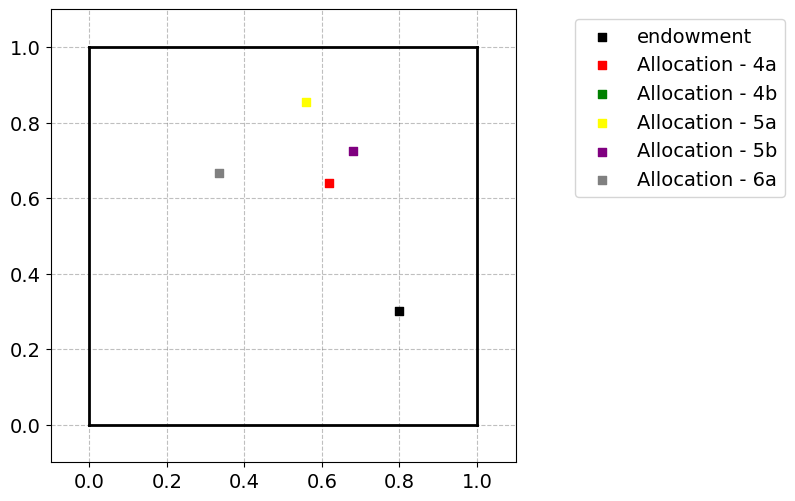

In [11]:
############################################
# Assignment 6b
############################################

# Create a new figure and axis object
fig_new = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_sub = fig_new.add_subplot(1, 1, 1)

# Scatter plot for each allocation
ax_sub.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')
ax_sub.scatter(x1A_4a, x2A_4a, marker='s', color='red', label='Allocation - 4a')
ax_sub.scatter(x1A_4b, x2A_4b, marker='s', color='green', label='Allocation - 4b')
ax_sub.scatter(x1A_5a, x2A_5a, marker='s', color='yellow', label='Allocation - 5a')
ax_sub.scatter(x1A_5b, x2A_5b, marker='s', color='purple', label='Allocation - 5b')
ax_sub.scatter(x1A_6a, x2A_6a, marker='s', color='gray', label='Allocation - 6a')

# Limits
ax_sub.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_sub.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_sub.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_sub.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_sub.set_xlim([-0.1, w1bar + 0.1])
ax_sub.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_sub.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# shows plot
plt.show()

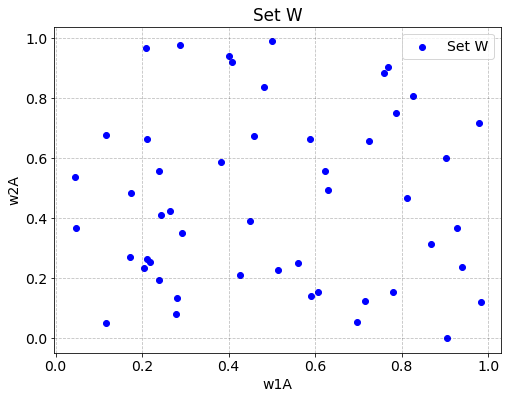

In [12]:
############################################
# Assignment 7
############################################

# Sets random seed
random.seed = '42'

# Empty lists with endowment values
w1A_list = []
w2A_list = []


i = 0
j = 0

# Loops that generate random values between 0 and 1 for w1a and appends to the empty lists created before
# Runs 2 times with j and 50 times with i
while j < 2:
    while i < 50:
        random_number = random.random()
        # Make sure the random number is not 0 or 1
        while random_number == 0 or random_number == 1:
            random_number = random.random()
            
            print("Random number between 0 and 1 (excluding 0 and 1):", random_number)
            
        if j == 0:
            w1A_list.append(random_number)
        else:
            w2A_list.append(random_number)
            
        #print(random_number)
        
        i+=1

    i=0
    j+=1



# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(w1A_list, w2A_list, color='blue', label='Set W')

# Set labels and title
plt.xlabel('w1A')
plt.ylabel('w2A')
plt.title('Set W')

# Add legend
plt.legend()

# Display the plot
plt.show()

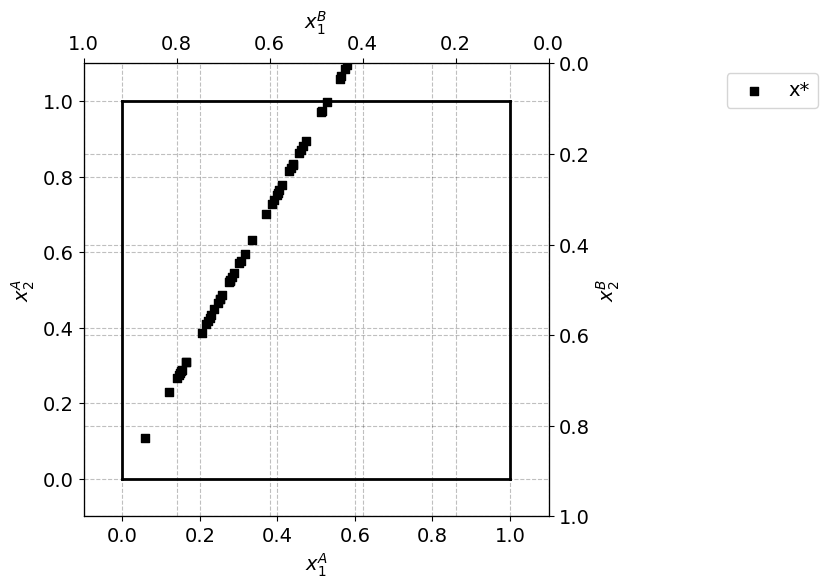

In [13]:
############################################
# Assignment 8
############################################

alpha = 1/3
beta = 2/3

# b. endowments
#w1B_list = [1 - w1A for w1A in w1A_list]
#w2B_list = [1 - w2A for w2A in w2A_list]

# Sets the price equal to the market clearing price in assignment 3
p1 = p1_market_clearing
x1A_list = []
x2A_list = []


# This while loops uses the endownments from the previous assignment and runs through each of them to find the market equilibrium allocation
# Then appends them to the empty lists created before
i = 0
while i < 50:
    
    x1A = alpha * (p1 * w1A_list[i] + 1 * w2A_list[i]) / (p1)
    x2A = (1 - alpha) * (p1 * w1A_list[i] + 1 * w2A_list[i]) / 1
    
    x1A_list.append(x1A)
    x2A_list.append(x2A)
    
    #print(x1A)
    
    
    i+=1

# Plots in a new edgeworth box
# Create a new figure and axis object
fig_new = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_new = fig_new.add_subplot(1, 1, 1)

ax_new.scatter(x1A_list, x2A_list, marker='s', color='black', label='x*')

# Draw the limits
ax_new.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_new.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_new.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_new.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Set labels and limits
ax_new.set_xlabel("$x_1^A$")
ax_new.set_ylabel("$x_2^A$")
ax_new.set_xlim([-0.1, w1bar + 0.1])
ax_new.set_ylim([-0.1, w2bar + 0.1])

# Create a twinx and twiny for secondary axes
temp_new = ax_new.twinx()
temp_new.set_ylabel("$x_2^B$")
ax_B_new = temp_new.twiny()
ax_B_new.set_xlabel("$x_1^B$")
ax_B_new.invert_xaxis()
ax_B_new.invert_yaxis()

# Add legend
ax_new.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))